<a href="https://colab.research.google.com/github/dhyannn/ML-LAB/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [43]:
path = '/content/drive/MyDrive/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
x = []
y = []
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x.append(img)
    y.append(classes[cls])


In [44]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
x = np.array(x)
y = np.array(y)

In [46]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

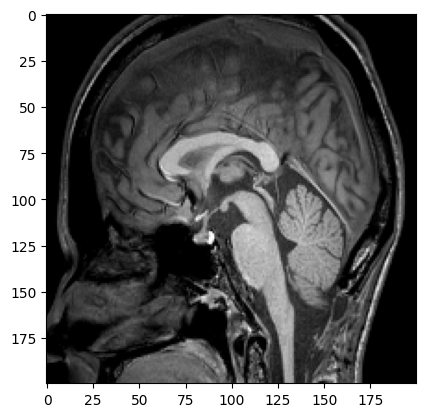

In [47]:
pt.imshow(x[0], cmap='gray');


In [48]:
x = x.reshape(len(x), -1)


In [49]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,
                                                    test_size=.20)

In [50]:
sv = svc()


In [51]:
sv.fit(x_train, y_train)


SVC()

In [52]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9907881269191402
Testing Score: 0.9591836734693877


In [53]:
ages = []
for i in range(1232):
  ages.append(np.random.randint(30,90))

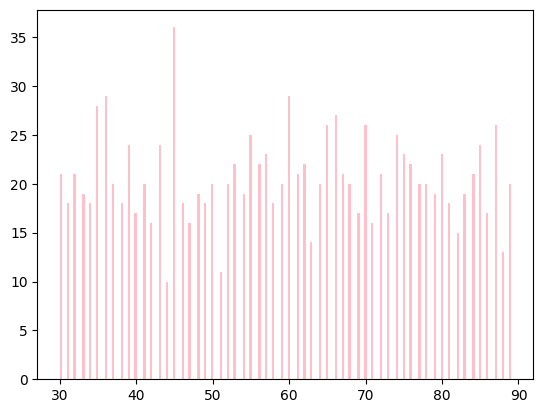

In [54]:
pt.hist(ages, bins=200, color='pink');


In [55]:
#sb.heatmap(np.corrcoef(ages, y), annot=True, cmap='flare', linewidths=6,\xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);

In [56]:
y_pred = sv.predict(x_test)

In [57]:
print('the precision score is',precision_score(y_test, y_pred))
print('the recall score is',recall_score(y_test, y_pred))
print('the f1-score is',f1_score(y_test, y_pred))

the precision score is 0.9583333333333334
the recall score is 0.9817073170731707
the f1-score is 0.9698795180722892


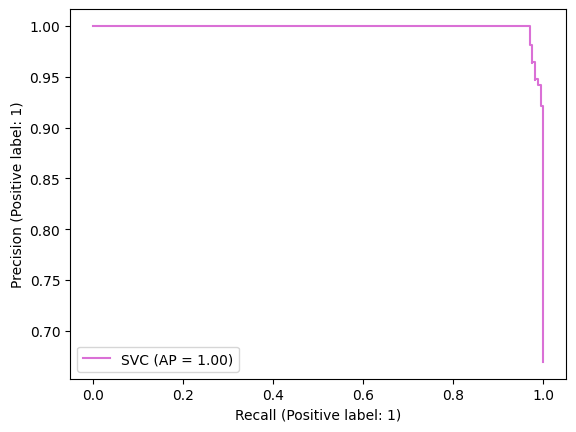

In [58]:
PrecisionRecallDisplay.from_estimator(sv, x_test, y_test, color='orchid');

In [59]:
sv = svc(probability=True)

In [60]:
sv.fit(x_train, y_train)

SVC(probability=True)

In [61]:
y_pred = sv.predict_proba(x_test)

In [62]:
fpr, tpr, thr = roc_curve(y_test, y_pred[:,1])

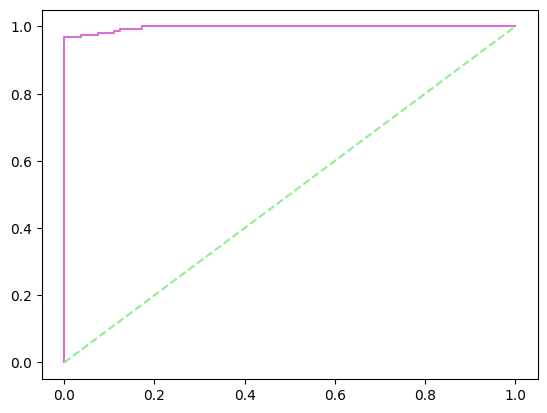

In [63]:
pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

In [64]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(svc(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  29.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  29.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=  30.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  28.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  28.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.929 total time=  10.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.903 total time=   9.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.903 total time=   8.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.964 total time=  10.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   9.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   8.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

In [65]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [66]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        81
           1       0.95      0.99      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.94      0.95       245
weighted avg       0.96      0.96      0.96       245



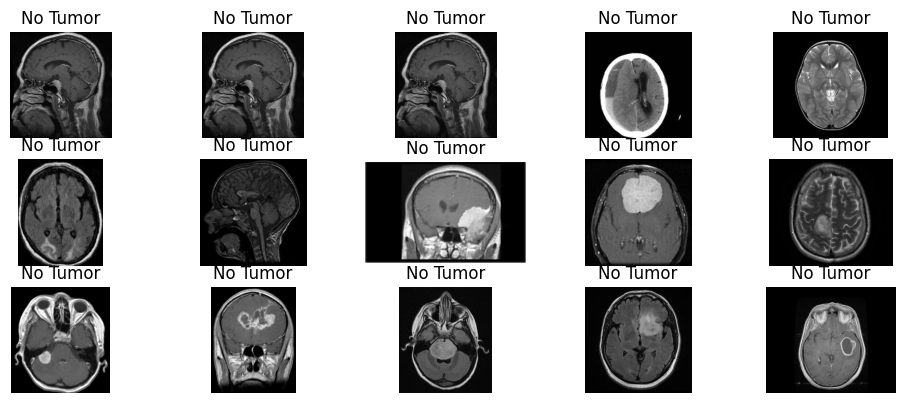

In [68]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
pt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Testing'
# print(path)
for i in os.listdir(path):
  for j in range(4):
    stw = 'image(' + str(j+1) +').jpg'
    pat = os.path.join(path,i,stw)
    # print(pat)
    img=cv2.imread(pat,0)
    # print(img)
    if img is not None:
      p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
      pt.subplot(5,5,c)
      pt.title(dec.get(p[0],'UnKnown'))
      pt.imshow(img,cmap='gray')
      pt.axis('off')
      c+=1;
pt.show();